# Import libraries

In [1]:
import os
import torch
from pathlib import Path
import pandas
import pdb; 
%load_ext autoreload
%autoreload 2

# Specify a image folder

In [2]:
IMAGE_FOLDER = Path(os.getcwd()).parent.parent.parent/'Data'/'houses/resize128jpg/train'

#test
assert os.path.isdir(IMAGE_FOLDER), str(str(IMAGE_FOLDER) + " is not an existing directory.")

# Specify columns

In [3]:
UNLABELED_TAG = "UNLABELED"

ATTRIBUTES = {
    "house_color":["WhiteGreyHouse","BrownHouse","BrickHouse","RedPinkOrangeHouse","BlueHouse","MixedHouse"],
    "fence_type":["WhitePicketFence","BlackFence","NoFence","ChainFence","BrownFence"],
    "steps_up":["NoSteps","Steps","LargePorch"]
}
for key in ATTRIBUTES.keys():
    ATTRIBUTES[key].append(UNLABELED_TAG)

# Specify a CSV (existing or not) and Image Column

In [4]:
OVERWRITE_CSV = False
CSV_PATH = Path('combined128.csv').absolute()
CSV_IMAGE_COLUMN = 'image_path' #relative path of image inside IMG_FOLDER e.g. train/cat/10.jpg

#test
assert(os.path.isdir(CSV_PATH.parent))
if (not os.path.isfile(CSV_PATH)) or OVERWRITE_CSV:
    print("OVERWRITING CSV ")
    from lib.prep import create_csv_with_image_paths
    output = create_csv_with_image_paths(CSV_PATH, CSV_IMAGE_COLUMN, IMAGE_FOLDER, list(ATTRIBUTES.keys()))

# Load Widget
Widget loads subset (4 or so) images for user to label

In [5]:
a = False
b = not a
b

True

In [6]:
from lib.widgets import MultilabelerWidget
        
mlw = MultilabelerWidget(csv_path = CSV_PATH, image_folder = IMAGE_FOLDER, image_column=CSV_IMAGE_COLUMN, attributes=ATTRIBUTES, width = 300)

# Load labeled images into dataset

In [7]:
dtype_dict = {}
for attribute in ATTRIBUTES:
    dtype_dict[attribute]='category'

df = pandas.read_csv(CSV_PATH,dtype=dtype_dict)

In [8]:
df

,Unnamed: 0,id,id.1,id.1.1,id.1.1.1,id.1.1.1.1,id.1.1.1.1.1,id.1.1.1.1.1.1,image_path,house_color,fence_type,steps_up
0,0,0,0,0,0,0,0,0,0.jpg,WhiteGreyHouse,NoFence,NoSteps
1,1,1,1,1,1,1,1,1,1.jpg,WhiteGreyHouse,NoFence,LargePorch
2,2,2,2,2,2,2,2,2,10.jpg,WhiteGreyHouse,BrownFence,NoSteps
3,3,3,3,3,3,3,3,3,100.jpg,RedPinkOrangeHouse,NoFence,NoSteps
4,4,4,4,4,4,4,4,4,1000.jpg,WhiteGreyHouse,NoFence,NoSteps
...,...,...,...,...,...,...,...,...,...,...,...,...
88481,315,88481,88481,88481,88481,88481,88481,88481,www_worthingcourtblog_com_wp-content_uploads_2...,UNLABELED,UNLABELED,LargePorch
88482,316,88482,88482,88482,88482,88482,88482,88482,www_ylighting_com_blog_wp-content_uploads_2016...,UNLABELED,UNLABELED,LargePorch
88483,317,88483,88483,88483,88483,88483,88483,88483,www_younghouselove_com_wp-content_uploads_2019...,UNLABELED,UNLABELED,LargePorch
88484,318,88484,88484,88484,88484,88484,88484,88484,www_younghouselove_com_wp-content_uploads_2019...,UNLABELED,UNLABELED,LargePorch


In [9]:
import fastai
from fastai import *
from fastai.vision import *
from fastai.vision.data import *

In [10]:
porches_df = df[df['steps_up']!=UNLABELED_TAG]

In [11]:
porches_df

,Unnamed: 0,id,id.1,id.1.1,id.1.1.1,id.1.1.1.1,id.1.1.1.1.1,id.1.1.1.1.1.1,image_path,house_color,fence_type,steps_up
0,0,0,0,0,0,0,0,0,0.jpg,WhiteGreyHouse,NoFence,NoSteps
1,1,1,1,1,1,1,1,1,1.jpg,WhiteGreyHouse,NoFence,LargePorch
2,2,2,2,2,2,2,2,2,10.jpg,WhiteGreyHouse,BrownFence,NoSteps
3,3,3,3,3,3,3,3,3,100.jpg,RedPinkOrangeHouse,NoFence,NoSteps
4,4,4,4,4,4,4,4,4,1000.jpg,WhiteGreyHouse,NoFence,NoSteps
...,...,...,...,...,...,...,...,...,...,...,...,...
88481,315,88481,88481,88481,88481,88481,88481,88481,www_worthingcourtblog_com_wp-content_uploads_2...,UNLABELED,UNLABELED,LargePorch
88482,316,88482,88482,88482,88482,88482,88482,88482,www_ylighting_com_blog_wp-content_uploads_2016...,UNLABELED,UNLABELED,LargePorch
88483,317,88483,88483,88483,88483,88483,88483,88483,www_younghouselove_com_wp-content_uploads_2019...,UNLABELED,UNLABELED,LargePorch
88484,318,88484,88484,88484,88484,88484,88484,88484,www_younghouselove_com_wp-content_uploads_2019...,UNLABELED,UNLABELED,LargePorch


fastai loading taken from
https://gist.github.com/yang-zhang/ec071ae4775c2125595fd80f40efb0d6#file-multi-face-ipynb

In [12]:
from lib.prep import LabelCls
il = ImageList.from_df(df=porches_df, path='/', folder=IMAGE_FOLDER, cols = CSV_IMAGE_COLUMN)
sil = il.split_by_rand_pct(0.4,2)
lsil = sil.label_from_df(cols=list(ATTRIBUTES), label_cls=LabelCls, ATTRIBUTES=ATTRIBUTES)

tfms = get_transforms(flip_vert=False, max_rotate= 10,xtra_tfms=[])
for tfm in tfms:
    for subtfm in tfm:
        subtfm.use_on_y = False
        
lsil.transform(tfms, tfm_y=False)
blsil = lsil.databunch(num_workers=4, bs=10)

In [13]:
blsil

ImageDataBunch;

Train: LabelList (204 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: LabelCls
[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.],[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.],[0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.],[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.],[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
Path: /;

Valid: LabelList (135 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: LabelCls
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.],[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.],[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.],[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
Path: /;

Test: None

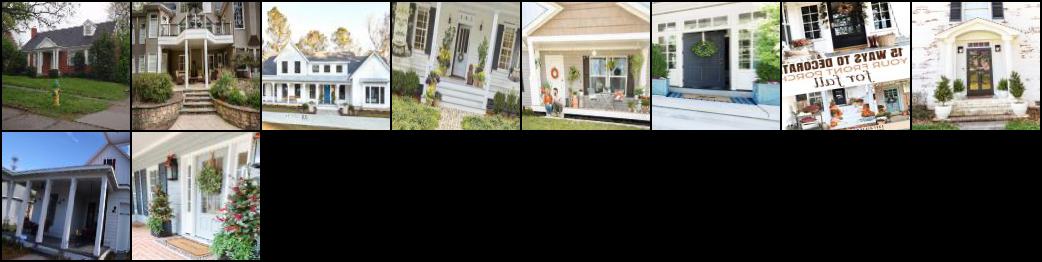

In [14]:
from torchvision.utils import make_grid , save_image
x, y = blsil.one_batch()
Image(make_grid(x))

# Specify a save location for the classifier model

In [15]:
CLASSIFIER_EXPORT = Path(os.getcwd())/'classifier_export.pt'

In [16]:
def myloss(input,target):
    target = target.long()
    one_hot_map = blsil.y.one_hot_map
    input_split = []
    losses = 0
    for segment_endpoints in blsil.y.attribute_label_endpoints:
        attribute_input = input[:,segment_endpoints[0]:segment_endpoints[1]]
        attribute_target = target[:,segment_endpoints[0]:segment_endpoints[1]]
        assert(torch.sum(attribute_target)==attribute_target.shape[0]), attribute_target
        mask = (1-attribute_target[:,-1:])
        masked_target = attribute_target[:,:] * mask
        masked_input = attribute_input[:,:] * mask.float()
        assert(torch.sum(masked_target)<=masked_target.shape[0]),masked_target
        attribute_loss = None
        if segment_endpoints[1]-segment_endpoints[0] > 1:
            masked_target = masked_target.argmax(dim=1)
            attribute_loss = F.cross_entropy(masked_input, masked_target)
        else:
            attribute_loss = F.l1_loss(attribute_input, attribute_target.unsqueeze(1))
        losses+=(attribute_loss)
    return  losses
        

In [17]:
class Attribute_accuracy_metric:
    
    def __init__(self,attribute_idx):
        print(attribute_idx)
        self.segment_start, self.segment_end = blsil.y.attribute_label_endpoints[attribute_idx]
        self.func = self.__call__
        self.name = list(ATTRIBUTES)[attribute_idx]
        
        
    def __call__(self, input_targs):
        input_segment = input[self.segment_starts : self.segment_end]
        target_segment = targs[self.segment_starts : self.segment_end]
        return accuracy(input_segment, target_segment)
        

In [18]:
metrics=[Attribute_accuracy_metric(idx) for idx in range(len(blsil.y.attribute_label_endpoints))]
metrics = []
learn = cnn_learner(blsil, models.resnet18, metrics=metrics, pretrained=True, callback_fns=ShowGraph)
learn.loss_func = myloss

0
1
2


epoch,train_loss,valid_loss,time
0,5.952088,6.582737,00:01
1,5.265995,4.401174,00:01
2,4.757717,4.277905,00:01
3,4.446988,4.126886,00:01
4,4.186660,4.127751,00:01
5,4.044283,4.184974,00:01
6,3.951799,4.168666,00:01
7,3.865805,4.122422,00:01
8,3.806976,4.123483,00:01
9,3.754037,4.182007,00:01


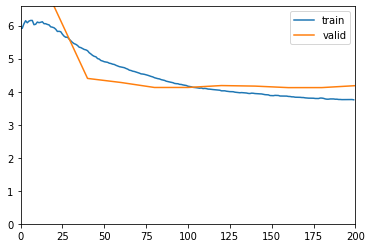

In [19]:
learn.fit(4)

In [20]:
def train_model(sz, bs, lr):
    learn.data=get_data(sz, bs)
    learn.freeze()
    learn.fit_one_cycle(5, slice(lr))
    learn.unfreeze()
    learn.fit_one_cycle(5, slice(lr/20, lr/2), pct_start=0.1)
    learn.save(f"{target}")



In [21]:
from lib.widgets import MultilabelerActiveLearningWidget

In [58]:
from lib.widgets import MultilabelerActiveLearningWidget
        
mlw = MultilabelerActiveLearningWidget(learner = learn, classifier_export= CLASSIFIER_EXPORT, 
                         csv_path = CSV_PATH,
                         image_folder = IMAGE_FOLDER, 
                         image_column=CSV_IMAGE_COLUMN, 
                         attributes=ATTRIBUTES,
                                       unlabeled_tag = UNLABELED_TAG,
                         width = 300)

In [35]:
mlw.original_df

,Unnamed: 0,id,id.1,id.1.1,id.1.1.1,id.1.1.1.1,id.1.1.1.1.1,id.1.1.1.1.1.1,image_path,house_color,fence_type,steps_up
0,0,0,0,0,0,0,0,0,0.jpg,WhiteGreyHouse,NoFence,NoSteps
1,1,1,1,1,1,1,1,1,1.jpg,WhiteGreyHouse,NoFence,LargePorch
2,2,2,2,2,2,2,2,2,10.jpg,WhiteGreyHouse,BrownFence,NoSteps
3,3,3,3,3,3,3,3,3,100.jpg,RedPinkOrangeHouse,NoFence,NoSteps
4,4,4,4,4,4,4,4,4,1000.jpg,WhiteGreyHouse,NoFence,NoSteps
...,...,...,...,...,...,...,...,...,...,...,...,...
88481,315,88481,88481,88481,88481,88481,88481,88481,www_worthingcourtblog_com_wp-content_uploads_2...,UNLABELED,UNLABELED,LargePorch
88482,316,88482,88482,88482,88482,88482,88482,88482,www_ylighting_com_blog_wp-content_uploads_2016...,UNLABELED,UNLABELED,LargePorch
88483,317,88483,88483,88483,88483,88483,88483,88483,www_younghouselove_com_wp-content_uploads_2019...,UNLABELED,UNLABELED,LargePorch
88484,318,88484,88484,88484,88484,88484,88484,88484,www_younghouselove_com_wp-content_uploads_2019...,UNLABELED,UNLABELED,LargePorch


In [36]:
mlw.df

,Unnamed: 0,id,id.1,id.1.1,id.1.1.1,id.1.1.1.1,id.1.1.1.1.1,id.1.1.1.1.1.1,image_path,house_color,fence_type,steps_up
122,122,122,122,122,122,122,122,122,13508.jpg,UNLABELED,NoFence,UNLABELED
123,123,123,123,123,123,123,123,123,13509.jpg,UNLABELED,WhitePicketFence,UNLABELED
127,127,127,127,127,127,127,127,127,13512.jpg,UNLABELED,UNLABELED,UNLABELED
128,128,128,128,128,128,128,128,128,13513.jpg,UNLABELED,UNLABELED,UNLABELED
165,165,165,165,165,165,165,165,165,17312.jpg,UNLABELED,UNLABELED,UNLABELED
166,166,166,166,166,166,166,166,166,17313.jpg,UNLABELED,UNLABELED,UNLABELED
169,169,169,169,169,169,169,169,169,17316.jpg,UNLABELED,UNLABELED,UNLABELED
170,170,170,170,170,170,170,170,170,1920.jpg,UNLABELED,UNLABELED,UNLABELED
171,171,171,171,171,171,171,171,171,19200.jpg,UNLABELED,UNLABELED,UNLABELED
172,172,172,172,172,172,172,172,172,19201.jpg,UNLABELED,UNLABELED,UNLABELED


In [34]:
mlw.requests

tensor([2, 3, 0, 1, 6, 5, 8, 4, 7, 9])

In [56]:
row_array = [row for row in mlw.df.iterrows()]
reindexed_row_array = [row_array[i][1] for i in mlw.requests]
reindexed_row_array

[Unnamed: 0              127
 id                      127
 id.1                    127
 id.1.1                  127
 id.1.1.1                127
 id.1.1.1.1              127
 id.1.1.1.1.1            127
 id.1.1.1.1.1.1          127
 image_path        13512.jpg
 house_color       UNLABELED
 fence_type        UNLABELED
 steps_up          UNLABELED
 Name: 127, dtype: object, Unnamed: 0              128
 id                      128
 id.1                    128
 id.1.1                  128
 id.1.1.1                128
 id.1.1.1.1              128
 id.1.1.1.1.1            128
 id.1.1.1.1.1.1          128
 image_path        13513.jpg
 house_color       UNLABELED
 fence_type        UNLABELED
 steps_up          UNLABELED
 Name: 128, dtype: object, Unnamed: 0              122
 id                      122
 id.1                    122
 id.1.1                  122
 id.1.1.1                122
 id.1.1.1.1              122
 id.1.1.1.1.1            122
 id.1.1.1.1.1.1          122
 image_path        1

In [57]:

pandas.DataFrame(reindexed_row_array)

,Unnamed: 0,id,id.1,id.1.1,id.1.1.1,id.1.1.1.1,id.1.1.1.1.1,id.1.1.1.1.1.1,image_path,house_color,fence_type,steps_up
127,127,127,127,127,127,127,127,127,13512.jpg,UNLABELED,UNLABELED,UNLABELED
128,128,128,128,128,128,128,128,128,13513.jpg,UNLABELED,UNLABELED,UNLABELED
122,122,122,122,122,122,122,122,122,13508.jpg,UNLABELED,NoFence,UNLABELED
123,123,123,123,123,123,123,123,123,13509.jpg,UNLABELED,WhitePicketFence,UNLABELED
169,169,169,169,169,169,169,169,169,17316.jpg,UNLABELED,UNLABELED,UNLABELED
166,166,166,166,166,166,166,166,166,17313.jpg,UNLABELED,UNLABELED,UNLABELED
171,171,171,171,171,171,171,171,171,19200.jpg,UNLABELED,UNLABELED,UNLABELED
165,165,165,165,165,165,165,165,165,17312.jpg,UNLABELED,UNLABELED,UNLABELED
170,170,170,170,170,170,170,170,170,1920.jpg,UNLABELED,UNLABELED,UNLABELED
172,172,172,172,172,172,172,172,172,19201.jpg,UNLABELED,UNLABELED,UNLABELED


In [43]:
mlw.df.reindex(mlw.requests, axis=1)

,2,3,0,1,6,5,8,4,7,9
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Train VAE

# Load classifier / train new classifier

# Load classifier + vae + modification vector for each column